In [1]:
# import all necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from utils.featureNormalize import featureNormalize
from utils.computeCostMulti import computeCostMulti
from utils.gradientDescentMulti import gradientDescentMulti
from utils.normalEqn import normalEqn
import itertools
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Part 1: Feature Normalization

In [2]:
print('Loading data ...\n')
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]
y = np.reshape(data[:, 2], (X.shape[0], 1))
m = X.shape[0]
X = np.column_stack((np.ones(len(X)), X))

# Print out some data points
print('First 10 examples from the dataset: \n')
print(' x =\n','\tX_0\t\tX_1\t\tX_2\n', X[:10, :], '\n\ny =\n',  y[:10], '\n')

Loading data ...

First 10 examples from the dataset: 

 x =
 	X_0		X_1		X_2
 [[  1.00000000e+00   2.10400000e+03   3.00000000e+00]
 [  1.00000000e+00   1.60000000e+03   3.00000000e+00]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00]
 [  1.00000000e+00   1.41600000e+03   2.00000000e+00]
 [  1.00000000e+00   3.00000000e+03   4.00000000e+00]
 [  1.00000000e+00   1.98500000e+03   4.00000000e+00]
 [  1.00000000e+00   1.53400000e+03   3.00000000e+00]
 [  1.00000000e+00   1.42700000e+03   3.00000000e+00]
 [  1.00000000e+00   1.38000000e+03   3.00000000e+00]
 [  1.00000000e+00   1.49400000e+03   3.00000000e+00]] 

y =
 [[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]
 [ 299900.]
 [ 314900.]
 [ 198999.]
 [ 212000.]
 [ 242500.]] 



In [3]:
# Scale features and set them to zero mean
print('Normalizing Features ...\n')
normalizedX, mu, sigma = featureNormalize(X)

Normalizing Features ...



# Part 2: Gradient Descent

Running gradient descent ...



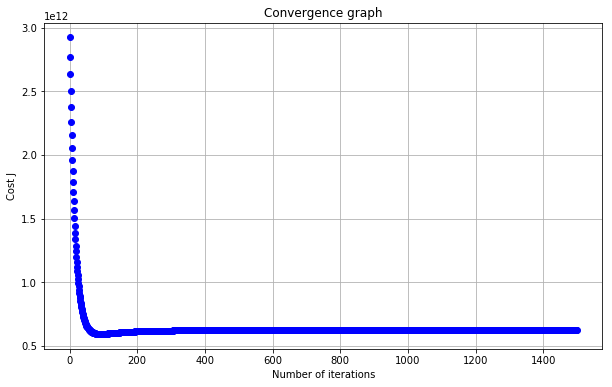

In [4]:
print('Running gradient descent ...\n')

alpha = 0.03       # this learning rate seems to work well 
num_iters = 1500   # default number of iterations given does not converge well

# Init Theta and Run Gradient Descent
theta = np.zeros((normalizedX.shape[1], 1))
theta, J_history = gradientDescentMulti(normalizedX, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(J_history)), J_history, 'bo')
plt.grid(True)
plt.title("Convergence graph")
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.show()

In [5]:
# Display gradient descent's result
print('Theta computed from gradient descent: \n')
print('theta0=', theta[0], '\ntheta1=', theta[1], '\ntheta2=', theta[2], '\n')

# Estimate the price of a 1650 sq-ft, 3 br house
testx = np.array([1., 1650., 3.])
testx[1] = (testx[1] - mu[1])/sigma[1] # normalize the test values to get the correct results as features were normalizd
testx[2] = (testx[2] - mu[2])/sigma[2]
predict_g = np.dot(testx,theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):', predict_g[0], '\n')


Theta computed from gradient descent: 

theta0= [ 340412.65957447] 
theta1= [ 109447.79634183] 
theta2= [-6578.35472634] 

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 293081.464363 



# Part 3: Normal Equations

In [6]:
print('Solving with normal equations...\n')
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations: \n')
print('theta0=', theta[0], '\ntheta1=', theta[1], '\ntheta2=', theta[2], '\n')

# Estimate the price of a 1650 sq-ft, 3 br house
predict_n = np.array([1., 1650., 3.]).dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):', predict_n[0])

Solving with normal equations...

Theta computed from the normal equations: 

theta0= [ 89597.9095428] 
theta1= [ 139.21067402] 
theta2= [-8738.01911233] 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.464335
